# Insurance cost prediction using linear regression model:


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [48]:
df= pd.read_csv("insurance data.csv")

In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [52]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


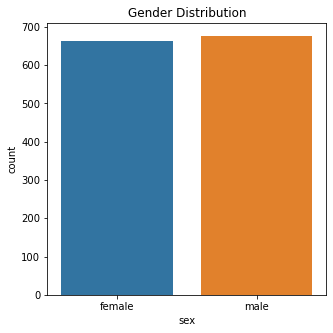

In [53]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x= 'sex')
plt.title("Gender Distribution");

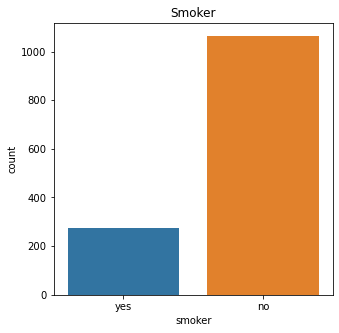

In [54]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x= 'smoker')
plt.title("Smoker");

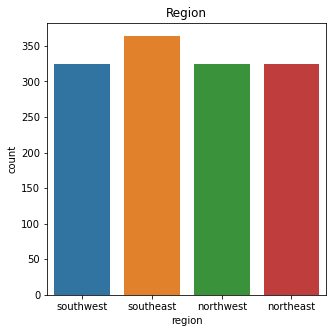

In [55]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x= 'region')
plt.title("Region");

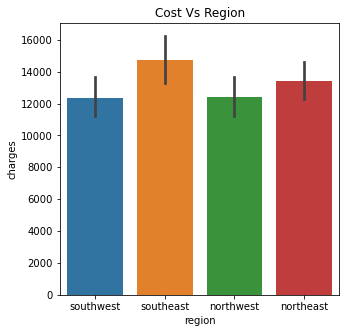

In [56]:
plt.figure(figsize=(5,5))
sns.barplot(data=df, x= 'region',y= 'charges' )
plt.title("Cost Vs Region");

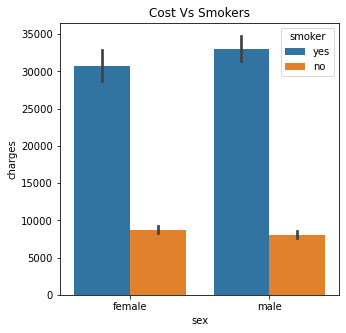

In [57]:
plt.figure(figsize=(5,5))
sns.barplot(data=df, x= 'sex',y= 'charges',hue= 'smoker' )
plt.title("Cost Vs Smokers");

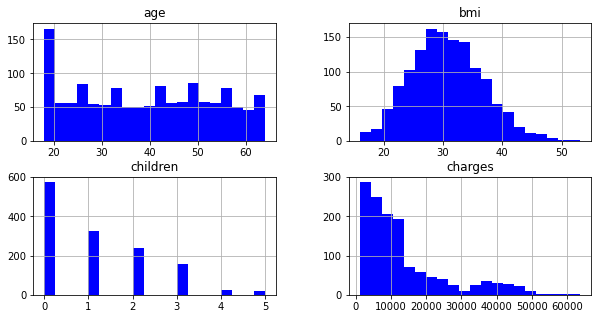

In [58]:
df[['age','bmi','children','charges']].hist(bins= 20,figsize=(10,5), color='blue');

In [59]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
#converting_strings_into_integers_to_plot_heatmap
df['sex']=df['sex'].apply({'male':0, 'female':1}.get)
df['smoker']=df['smoker'].apply({'yes':1, 'no':0}.get)
df['region']=df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [62]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


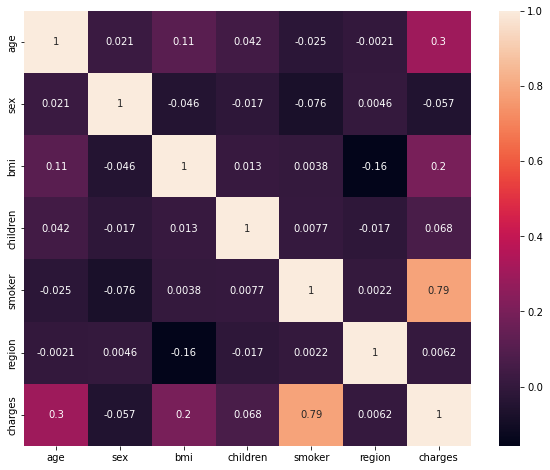

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot= True)
plt.savefig("correlation_heatmap.jpg");

# Allocating the data and applying linear regression model


In [67]:
# For X data dropping the target columns which has very low correlation
X =df.drop(['sex','charges'], axis=1)

y=df.charges

In [69]:
# Splitting into training and testing data 
from sklearn.model_selection import train_test_split

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (936, 5)
X_test shape:  (402, 5)
y_train shape:  (936,)
y_test shape:  (402,)


In [70]:
#Loading the linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()


In [71]:
#Fitting the train data into model
linreg.fit(X_train, y_train)

LinearRegression()

In [72]:
#Doing prediction on X_test data
pred = linreg.predict(X_test)

In [81]:
#Calculating r2_score to see how well the model fits the data
from sklearn.metrics import r2_score
print("r2 score: ", (r2_score(y_test, pred)))


r2 score:  0.7697211527941855


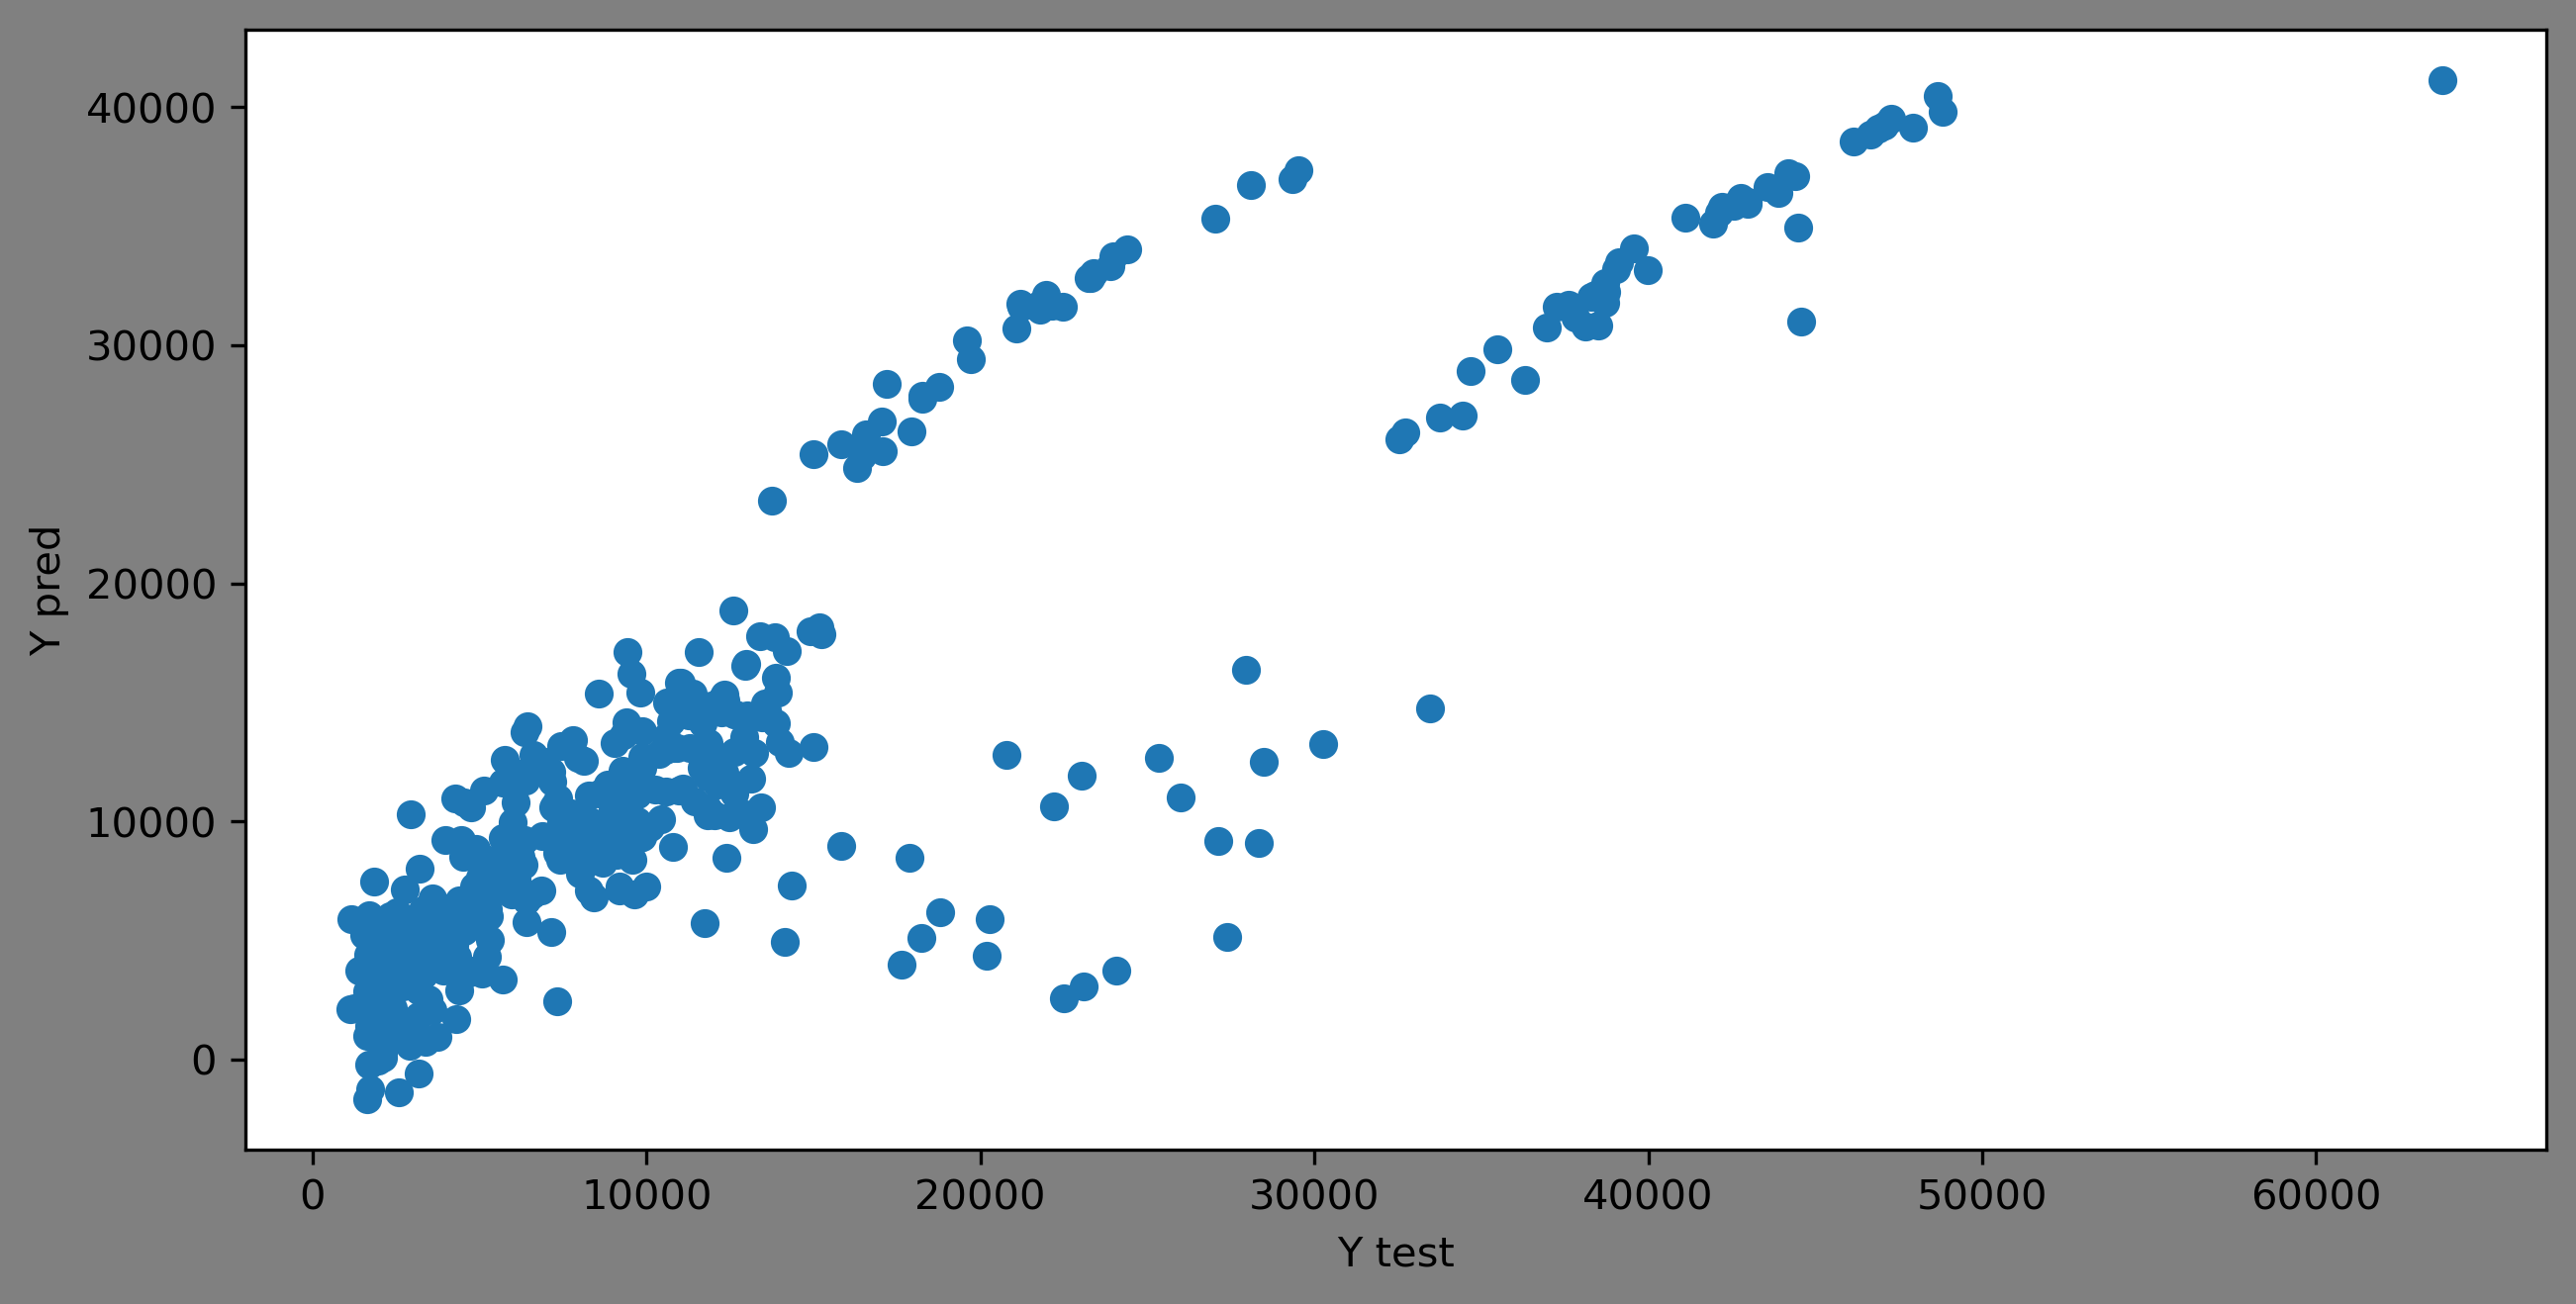

In [93]:
#plotting the graph to see how well the model predicts
plt.figure(figsize=(10,5), dpi= 300,facecolor='grey', edgecolor='red')
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.savefig("test_vs_predicted.jpg");

In [95]:
#Predicting the medical insurance cost for some new customer which is smoker
data = {'age':50, 'bmi':25, 'children':2, 'smoker':0, 'region':2}
customer_df = pd.DataFrame(data, index=[0])
customer_df

,age,bmi,children,smoker,region
0,50,25,2,0,2


In [96]:
cost_pred = linreg.predict(customer_df)
print(" The medical insurance cost of new customer is: ", cost_pred)

 The medical insurance cost of new customer is:  [9579.86504857]


In [98]:
#Predicting the medical insurance cost for some new customer which is non-smoker
data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
customer_df = pd.DataFrame(data, index=[0])
cost_pred = linreg.predict(customer_df)
print(" The medical insurance cost of new customer is: ", cost_pred)

 The medical insurance cost of new customer is:  [33206.92756082]
